<h1 style="color:red">Credit Score Classification</h1>

<h2>Introduction</h2>

Dans ce projet, nous explorons un ensemble de données sur les scores de crédit avec l'objectif de comprendre les relations entre différentes variables et de préparer les données pour la modélisation de la classification du score de crédit

<h4>Importer</h4>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")
from scipy.stats import probplot


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> PARTIE 1</h1>
    
<b>Aperçu statistique de l'ensemble de données</b>
</div>

<h4>Lire des données</h4>

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<h4>La dimension de trames de données</h4>

In [3]:
df.shape

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<h4>Affichage certains détails statistiques de base comme le centile, la moyenne, l'écart type,...etc</h4>

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


<h4>Compter le nombre de valeurs manquantes (NaN ou NULL)</h4>

In [6]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<h4>Vérifier s'il y a des lignes dupliquées</h4>

In [7]:
df.duplicated().sum() 

0

<h4>Supprimer ces colonnes n'affecte pas le score de crédit comme 'ID', Customer_ID', 'Name', 'SSN'</h4>

In [8]:
df.drop(['ID', 'Customer_ID', 'Name', 'SSN','Type_of_Loan'], axis=1, inplace = True)
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<h4>Alternative à l'information</h4>

In [9]:
def columns_info (df):
    columns=[]
    dtypes=[]
    unique=[]
    nunique=[]
    nulls=[]
    
    for cols in df.columns:
        columns.append(cols)
        dtypes.append(df[cols].dtypes)
        unique.append(df[cols].unique())
        nunique.append(df[cols].nunique())
        nulls.append(df[cols].isna().sum())
    
    return pd.DataFrame({'Columns': columns,
                         'Data Types': dtypes,
                         'Unique Values': unique,
                         'Number of unique': nunique,
                         'Missing Values': nulls
                        })
columns_info(df)

,Columns,Data Types,Unique Values,Number of unique,Missing Values
0,Month,object,"[January, February, March, April, May, June, J...",8,0
1,Age,object,"[23, -500, 28_, 28, 34, 54, 55, 21, 31, 33, 34...",1788,0
2,Occupation,object,"[Scientist, _______, Teacher, Engineer, Entrep...",16,0
3,Annual_Income,object,"[19114.12, 34847.84, 34847.84_, 143162.64, 306...",18940,0
4,Monthly_Inhand_Salary,float64,"[1824.8433333333328, nan, 3037.986666666666, 1...",13235,15002
5,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 1414, 1231,...",943,0
6,Num_Credit_Card,int64,"[4, 1385, 5, 1288, 1, 7, 6, 1029, 488, 8, 1381...",1179,0
7,Interest_Rate,int64,"[3, 6, 8, 4, 5, 5318, 15, 7, 12, 20, 1, 433, 1...",1750,0
8,Num_of_Loan,object,"[4, 1, 3, 967, -100, 0, 0_, 2, 3_, 2_, 7, 5, 5...",434,0
9,Delay_from_due_date,int64,"[3, -1, 5, 6, 8, 7, 13, 10, 0, 4, 9, 1, 12, 11...",73,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> PARTIE 2</h1>
    
<b>Ingénierie des fonctionnalités</b>
</div>

<h4>Fonction pour le traitement des valeurs aberrantes (outliers) en utilisant Interquartile Range (IQR)</h4>

In [10]:
def check_outliers(col, df):
    col_data= df[col]
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr= q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outliers = []
    
    #outliers = col_data[(col_data<lower_bound)|(col_data>upper_bound)]
    
    for i in range(len(df)):
        value = df.loc[i, col]
        if value > upper_bound or value < lower_bound:
            outliers.append(value)
    
    return outliers

In [11]:
def handle_outliers(col, df):
    col_data= df[col]
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr= q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outliers = []
    
    # Remplacer les valeurs aberrantes par les bornes
    #df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    for i in range(len(df)):
        if df.loc[i, col] > upper_bound:
            df.loc[i, col] = upper_bound
        elif df.loc[i, col] < lower_bound:
            df.loc[i, col] = lower_bound

<h4>Nettoyage des données et Traitement des outliers</h4>

<p style="color:blue">1. Month</p>

In [12]:
df["Month"].value_counts()

August      12500
May         12500
July        12500
April       12500
March       12500
January     12500
February    12500
June        12500
Name: Month, dtype: int64

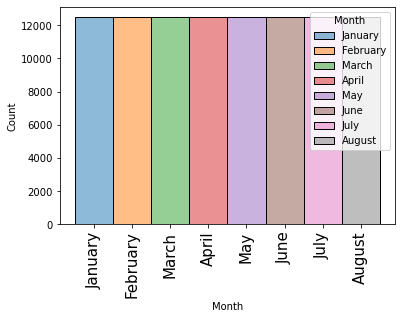

In [13]:
#plt.figure(figsize=(7,5))
#sns.countplot(y="Month", data=df, palette="Dark2")
plt.xticks(fontsize=15, rotation = 'vertical')
sns.histplot(df, x='Month', hue='Month')
plt.show()

In [14]:
df['Month'] = df['Month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8})
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

<p style="color:blue">2. Age</p>

In [15]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [16]:
df['Age'] = df['Age'].str.replace('-','')
df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].astype(int)
df["Age"].unique()

array([  23,  500,   28, ..., 4808, 2263, 1342])

In [17]:
df['Age'].isna().sum()

0

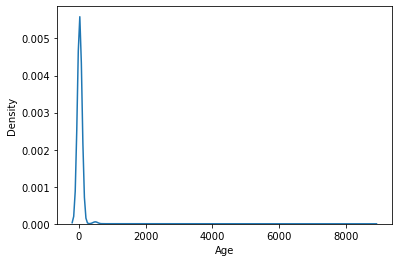

In [18]:
# Tracer la distribution des valeurs de la colonne 'Age' sous forme de Kernel Density Estimate, 
# qui est une estimation de la distribution de probabilité continue des données.
sns.kdeplot(df['Age'])
plt.show()

In [19]:
# vérifier les outliers de la colonne 'Age'
check_outliers('Age',df)

[500,
 7580,
 500,
 181,
 995,
 5079,
 6409,
 500,
 7080,
 849,
 500,
 3885,
 3052,
 5342,
 4431,
 500,
 2657,
 2111,
 1032,
 500,
 456,
 5717,
 500,
 500,
 500,
 3169,
 1191,
 500,
 7140,
 500,
 500,
 8233,
 6955,
 500,
 2534,
 3115,
 7657,
 5112,
 500,
 6452,
 2744,
 500,
 1439,
 5795,
 4872,
 500,
 1772,
 1383,
 5657,
 500,
 1934,
 500,
 8352,
 500,
 3734,
 500,
 2056,
 500,
 7508,
 2339,
 8406,
 1424,
 500,
 500,
 500,
 500,
 6953,
 5626,
 4471,
 548,
 500,
 500,
 500,
 500,
 769,
 500,
 500,
 500,
 5490,
 525,
 4202,
 3665,
 7670,
 500,
 4670,
 3616,
 6922,
 6619,
 1808,
 7992,
 223,
 1232,
 4659,
 6895,
 395,
 7099,
 500,
 6048,
 3936,
 500,
 3512,
 123,
 500,
 5639,
 471,
 500,
 7359,
 4049,
 5053,
 2109,
 7183,
 5604,
 1206,
 6835,
 500,
 4067,
 1812,
 1170,
 3625,
 500,
 6354,
 3724,
 480,
 500,
 500,
 500,
 5610,
 4710,
 500,
 4351,
 5784,
 3937,
 3542,
 2239,
 5645,
 500,
 7425,
 7851,
 500,
 2027,
 6306,
 835,
 3513,
 6846,
 6868,
 7805,
 500,
 7274,
 500,
 831,
 8394,
 500

In [20]:
handle_outliers('Age',df)

In [21]:
check_outliers('Age',df)

[]

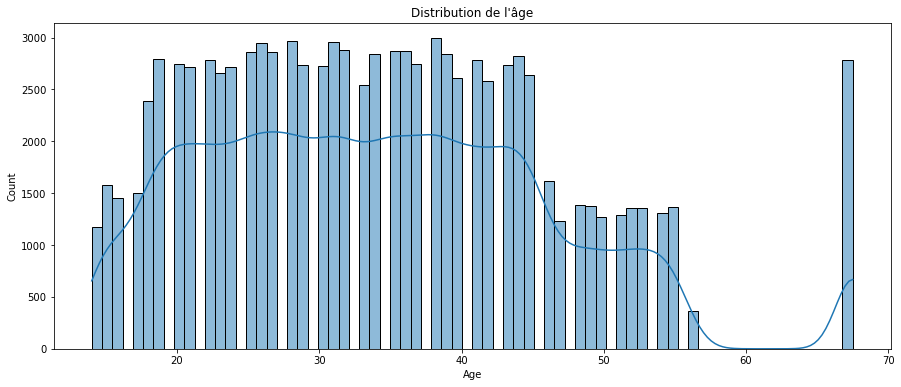

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(x='Age', data= df, kde=True)
plt.title("Distribution de l'âge")
plt.show()

<p style="color:blue">3. Occupation</p>

In [23]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [24]:
df['Occupation'] = df['Occupation'].replace('_______','FreeLancer')

In [25]:
df['Occupation'].unique()

array(['Scientist', 'FreeLancer', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

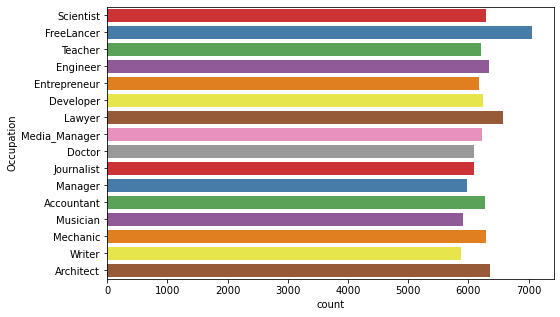

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(y="Occupation", data=df, palette="Set1")
plt.show()

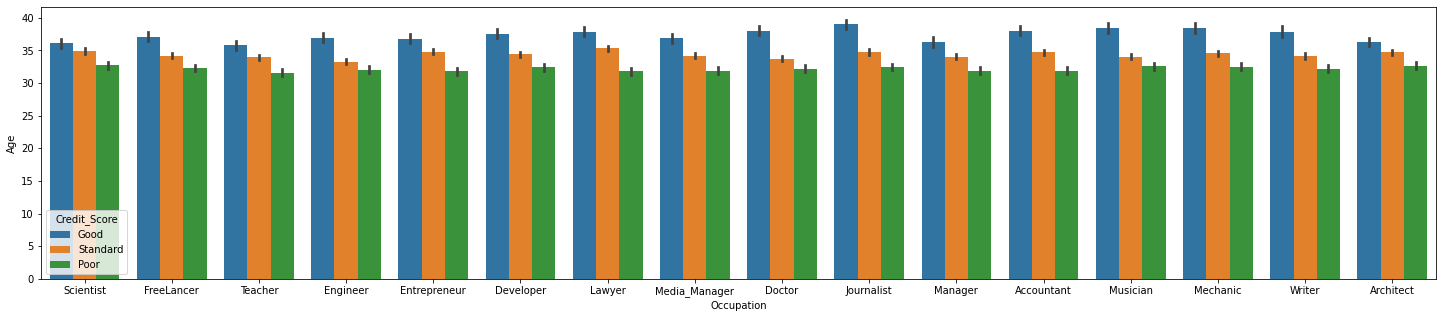

In [27]:
plt.figure(figsize=(25,5))
sns.barplot(x='Occupation', y='Age', data=df, hue='Credit_Score')
plt.show()

In [28]:
df['Occupation'].map({
    'Scientist':0,
    'Engineer':2,
    'Teacher':3,
    'Entrepreneur':4,
    'Developer':5,
    'Lawyer':6,
    'Media_Manager':7,
    'Doctor':8,
    'Journalist':9,
    'Manager':10,
    'Accountant':11,
    'Musician':12,
    'Mechanic':13,
    'Writer':14,
    'Architect':15
})

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
99995    13.0
99996    13.0
99997    13.0
99998    13.0
99999    13.0
Name: Occupation, Length: 100000, dtype: float64

In [29]:
df['Occupation'].value_counts()

FreeLancer       7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

<p style="color:blue>4. Annual_Income</p>

<p style="color:blue"> 4. Annual_Income </p>

In [31]:
df['Annual_Income'].value_counts()

17273.83      16
36585.12      16
20867.67      16
33029.66      15
9141.63       15
              ..
10563.445_     1
31170.53_      1
1406411.0      1
64175.56_      1
14938.01_      1
Name: Annual_Income, Length: 18940, dtype: int64

In [32]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].str.replace('-','')
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

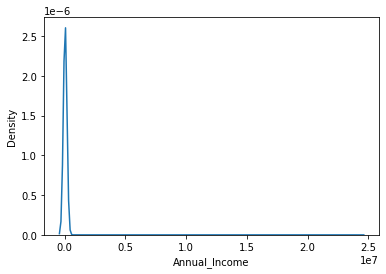

In [33]:
sns.kdeplot(df['Annual_Income'])
plt.show()

In [34]:
df['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [35]:
check_outliers('Annual_Income',df)

[10909427.0,
 6515990.0,
 586359.0,
 18334118.0,
 19717385.0,
 2709655.0,
 2592822.0,
 19257912.0,
 22335783.0,
 16367214.0,
 8908998.0,
 9351702.0,
 2547968.0,
 15560525.0,
 4282515.0,
 16174808.0,
 21246612.0,
 173196.32,
 173196.32,
 173196.32,
 173196.32,
 173196.32,
 173196.32,
 173196.32,
 173196.32,
 14089102.0,
 873048.0,
 12311582.0,
 22409880.0,
 177150.4,
 177150.4,
 177150.4,
 177150.4,
 177150.4,
 177150.4,
 177150.4,
 177150.4,
 5444147.0,
 162550.32,
 162550.32,
 162550.32,
 162550.32,
 162550.32,
 162550.32,
 162550.32,
 162550.32,
 9374962.0,
 11993705.0,
 174304.04,
 174304.04,
 174304.04,
 174304.04,
 174304.04,
 174304.04,
 174304.04,
 174304.04,
 13019734.0,
 16729446.0,
 7170493.0,
 3961526.0,
 23181767.0,
 174179.64,
 174179.64,
 174179.64,
 174179.64,
 174179.64,
 174179.64,
 174179.64,
 174179.64,
 21723268.0,
 177243.92,
 177243.92,
 177243.92,
 177243.92,
 177243.92,
 177243.92,
 177243.92,
 177243.92,
 14416399.0,
 3950629.0,
 22579073.0,
 20441835.0,
 18737

In [36]:
handle_outliers('Annual_Income',df)
check_outliers('Annual_Income',df)

[]

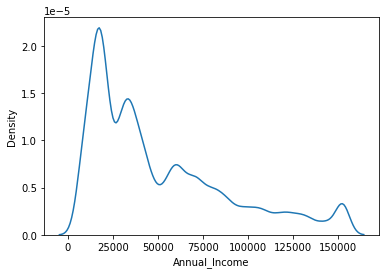

In [37]:
sns.kdeplot(df['Annual_Income'])
plt.show()

Text(0.5, 1.0, 'Annual Income By Occupation')

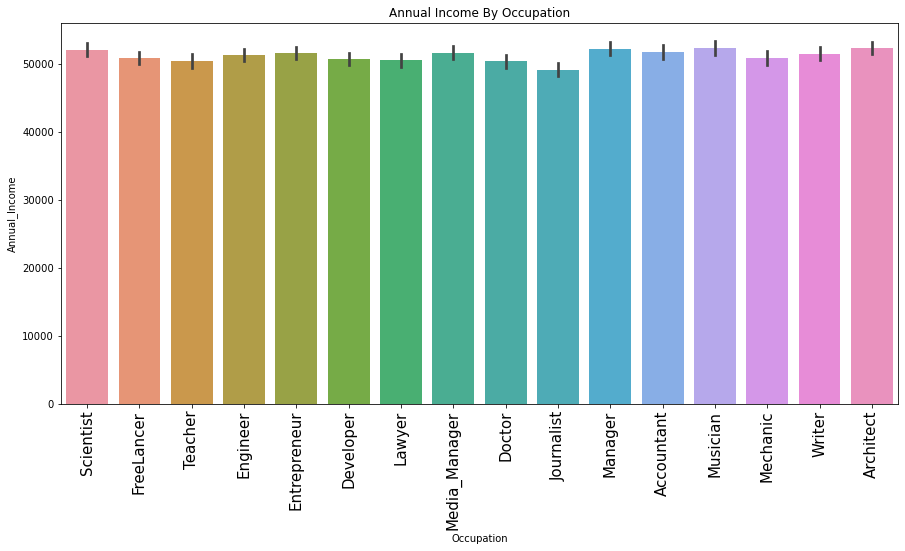

In [38]:
# figure du revenu annuel par profession
plt.figure(figsize=(15,7))
plt.xticks(fontsize=15, rotation = "vertical")
sns.barplot(y=df['Annual_Income'], x=df["Occupation"])
plt.title("Annual Income By Occupation")

<p style="color:blue">5. Monthly_Inhand_Salary</p>

In [39]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [40]:
# Remplacer les valeurs qui ne sont pas un entier par la valeur moyenne de la colonne
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean(), inplace=True)

In [41]:
# Vérifier s'il y a encore des valeurs 'Not A Number'
df['Monthly_Inhand_Salary'].isna().sum()

0

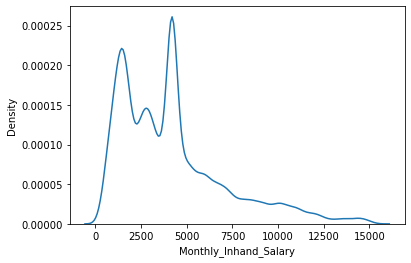

In [42]:
sns.kdeplot(df['Monthly_Inhand_Salary'])
plt.show()

In [43]:
check_outliers('Monthly_Inhand_Salary', df)

[12187.22,
 12187.22,
 12187.22,
 12187.22,
 12187.22,
 12187.22,
 12187.22,
 11242.783333333333,
 11242.783333333333,
 12432.61,
 12432.61,
 12432.61,
 12432.61,
 12432.61,
 12432.61,
 12432.61,
 12432.61,
 11809.56,
 11809.56,
 11809.56,
 11809.56,
 11809.56,
 10795.6325,
 10795.6325,
 10795.6325,
 10795.6325,
 10795.6325,
 10795.6325,
 11059.186666666665,
 11059.186666666665,
 10872.265057635459,
 10872.265057635459,
 10872.265057635459,
 10872.265057635459,
 10872.265057635459,
 10872.265057635459,
 10872.265057635459,
 11877.473333333333,
 11877.473333333333,
 11877.473333333333,
 11877.473333333333,
 11877.473333333333,
 11877.473333333333,
 11877.473333333333,
 11877.473333333333,
 11064.453333333333,
 11064.453333333333,
 11064.453333333333,
 12353.633333333333,
 12353.633333333333,
 12353.633333333333,
 12353.633333333333,
 12353.633333333333,
 12353.633333333333,
 11203.726666666667,
 11203.726666666667,
 11203.726666666667,
 11203.726666666667,
 11203.726666666667,
 11203.72

In [44]:
handle_outliers('Monthly_Inhand_Salary', df)
check_outliers('Monthly_Inhand_Salary', df)

[]

In [45]:
df['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4121.979810
std        2733.865830
min         303.645417
25%        1792.084167
50%        3852.736667
75%        5371.525000
max       10740.686250
Name: Monthly_Inhand_Salary, dtype: float64

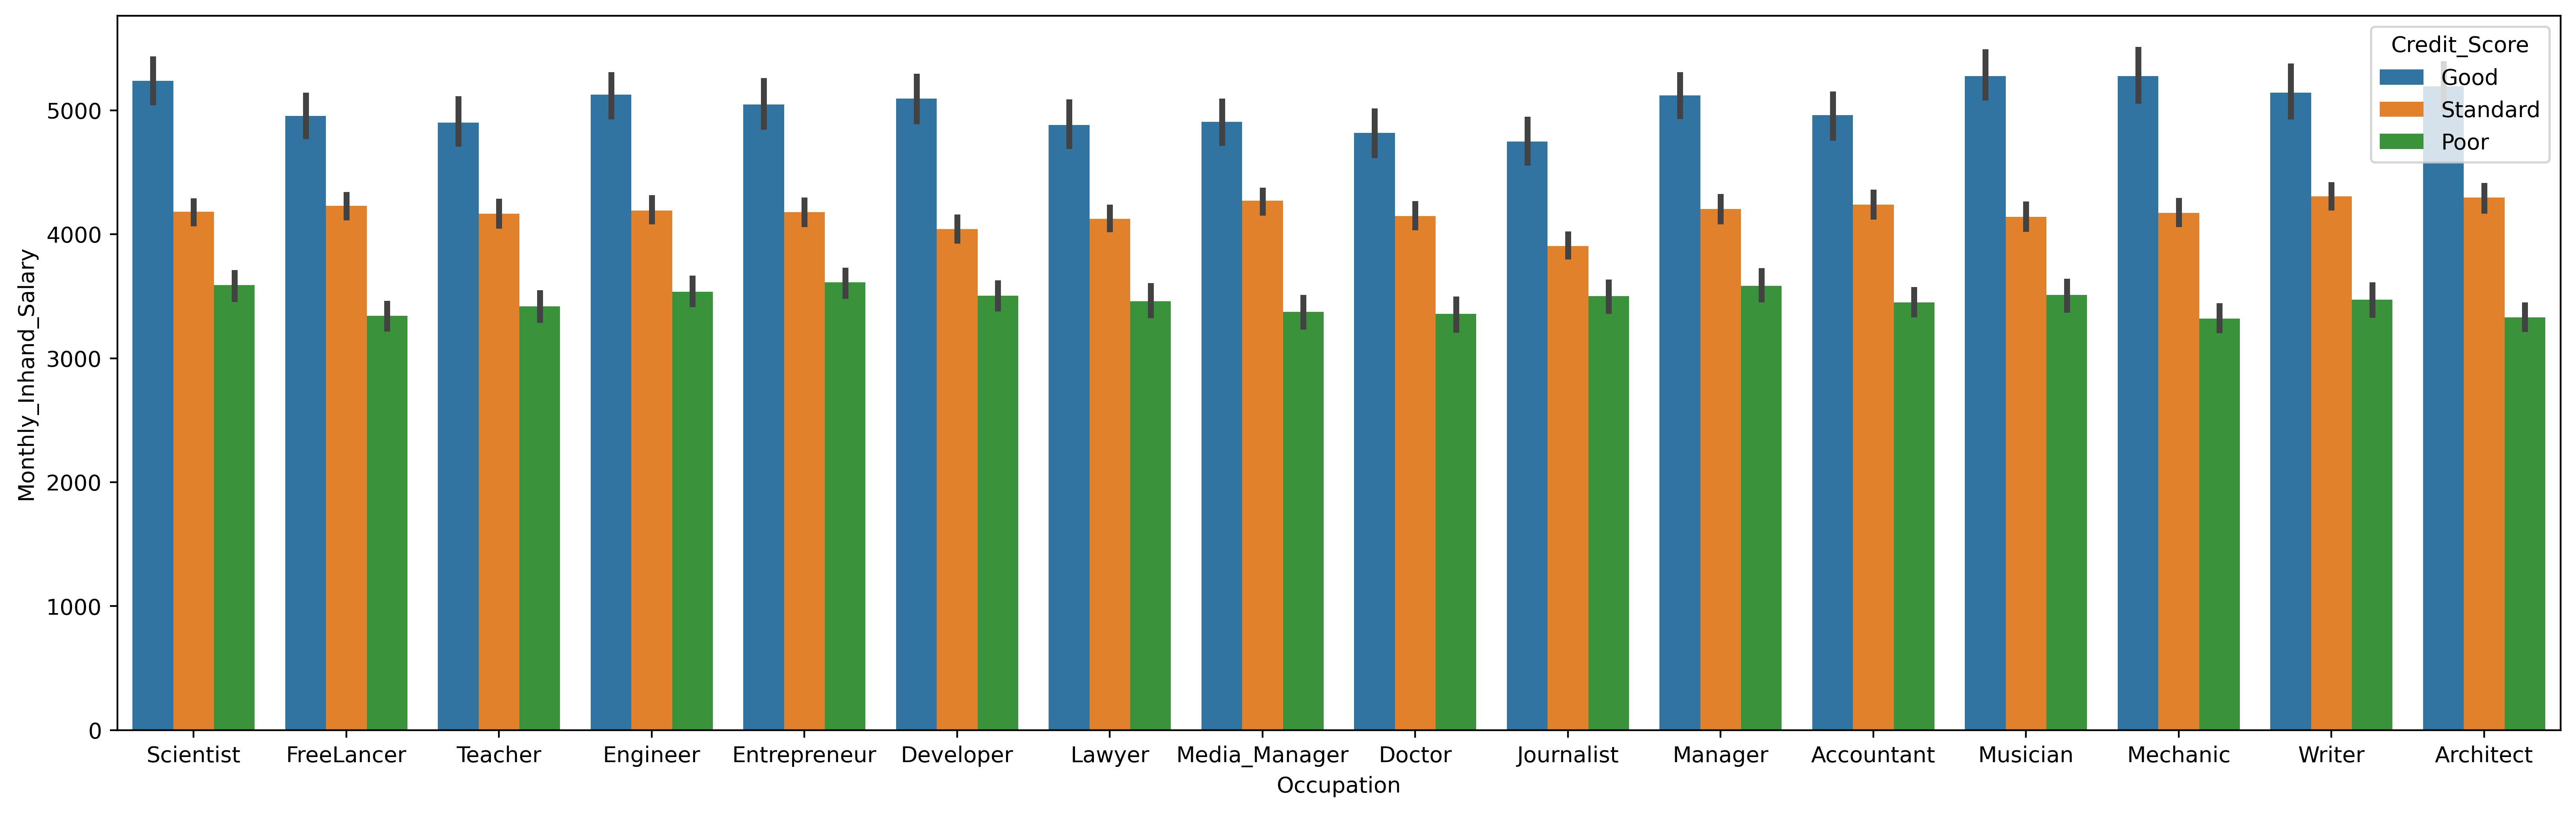

In [46]:
plt.figure(figsize = (20,6), dpi=400)
sns.barplot(x='Occupation', y='Monthly_Inhand_Salary', data=df, hue='Credit_Score')
plt.show()

<p style="color: blue">6. Num_Bank_Accounts</p>

In [47]:
df['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

In [48]:
check_outliers('Num_Bank_Accounts', df)

[1414,
 1231,
 67,
 572,
 1488,
 91,
 528,
 1647,
 1696,
 1338,
 649,
 889,
 1668,
 685,
 857,
 975,
 1496,
 1534,
 1620,
 37,
 1388,
 1429,
 1332,
 1588,
 120,
 1777,
 1096,
 803,
 494,
 744,
 1139,
 1414,
 831,
 1613,
 741,
 121,
 665,
 1748,
 1644,
 823,
 1356,
 1651,
 87,
 711,
 450,
 210,
 1671,
 1722,
 648,
 672,
 1662,
 1495,
 510,
 666,
 429,
 1131,
 1434,
 980,
 1026,
 526,
 718,
 1300,
 1312,
 1315,
 501,
 1566,
 480,
 1042,
 322,
 628,
 1016,
 333,
 1265,
 791,
 427,
 563,
 905,
 1190,
 1036,
 1611,
 38,
 619,
 555,
 1769,
 280,
 752,
 1201,
 812,
 1487,
 222,
 212,
 1019,
 1222,
 610,
 1714,
 1308,
 525,
 1158,
 1115,
 1616,
 754,
 494,
 1601,
 797,
 1577,
 521,
 703,
 933,
 959,
 809,
 1089,
 1668,
 1656,
 1113,
 1715,
 964,
 1533,
 1789,
 871,
 434,
 1295,
 565,
 1724,
 603,
 677,
 120,
 541,
 698,
 1101,
 464,
 1539,
 1462,
 1011,
 1257,
 1727,
 45,
 244,
 1266,
 897,
 535,
 484,
 331,
 675,
 1332,
 826,
 946,
 1675,
 105,
 1327,
 845,
 1026,
 549,
 473,
 710,
 210,
 527

In [49]:
handle_outliers('Num_Bank_Accounts', df)
check_outliers('Num_Bank_Accounts', df)

[]

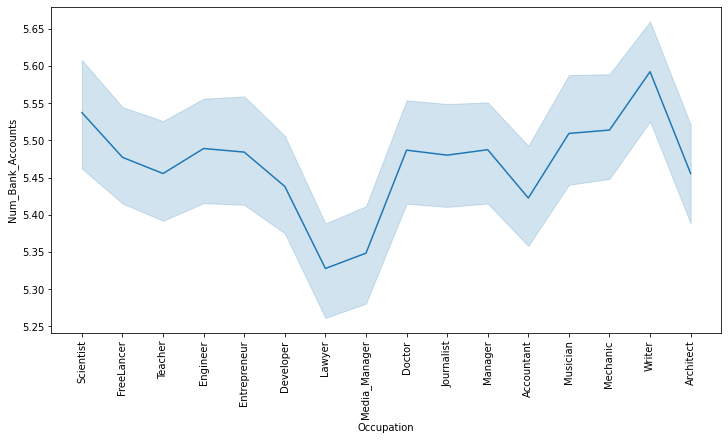

In [50]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=10, rotation='vertical')
sns.lineplot(data=df, x='Occupation', y='Num_Bank_Accounts')
plt.show()

In [51]:
df[df['Num_Credit_Card'] < 0]= 0

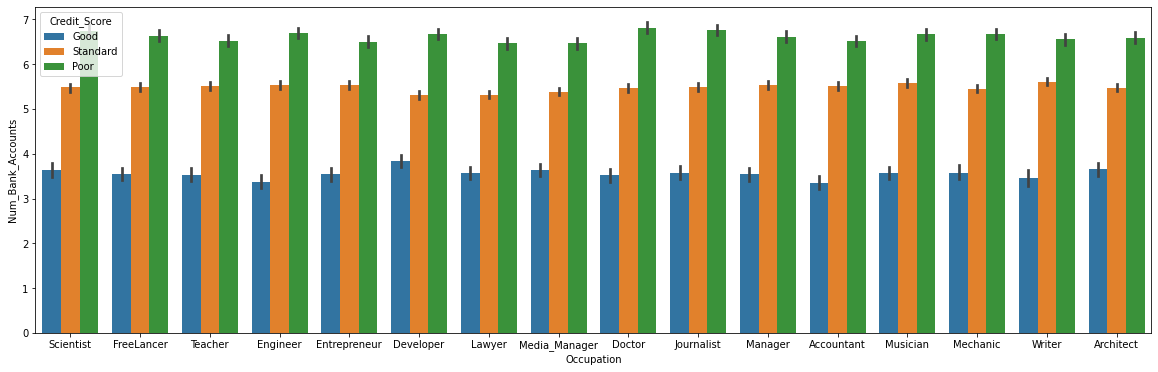

In [52]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['Occupation'], y= df['Num_Bank_Accounts'], data=df, hue='Credit_Score')
plt.show()

<p style="color:blue">7. Num_Credit_Card</p>

In [53]:
df['Num_Credit_Card'].value_counts()

5      18459
7      16615
6      16559
4      14030
3      13277
       ...  
810        1
682        1
726        1
918        1
122        1
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [54]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [55]:
check_outliers('Num_Credit_Card',df)

[1385,
 1288,
 1029,
 488,
 1381,
 898,
 518,
 1005,
 1327,
 1189,
 514,
 943,
 262,
 809,
 932,
 1247,
 688,
 848,
 1163,
 674,
 1315,
 1130,
 451,
 1486,
 1201,
 169,
 1423,
 1297,
 1299,
 183,
 538,
 1191,
 1292,
 1112,
 496,
 803,
 102,
 249,
 986,
 1426,
 211,
 1432,
 1477,
 615,
 184,
 1192,
 97,
 264,
 137,
 1387,
 1307,
 447,
 158,
 1141,
 780,
 1052,
 900,
 331,
 996,
 912,
 1071,
 879,
 419,
 1415,
 1038,
 132,
 39,
 170,
 403,
 622,
 1428,
 142,
 306,
 610,
 489,
 1223,
 637,
 1354,
 1434,
 1358,
 705,
 249,
 540,
 732,
 1208,
 1389,
 1480,
 1325,
 353,
 223,
 1084,
 1439,
 547,
 1375,
 980,
 392,
 569,
 1217,
 412,
 1323,
 1379,
 1174,
 380,
 889,
 297,
 1071,
 924,
 773,
 1178,
 1080,
 1168,
 363,
 758,
 1323,
 397,
 1436,
 472,
 183,
 1116,
 842,
 75,
 325,
 268,
 1326,
 731,
 1278,
 117,
 1192,
 1038,
 274,
 292,
 883,
 1072,
 997,
 953,
 716,
 86,
 1163,
 507,
 1456,
 648,
 736,
 634,
 309,
 1331,
 1165,
 1435,
 626,
 1223,
 1414,
 1056,
 372,
 151,
 890,
 490,
 909,
 1

In [56]:
handle_outliers('Num_Credit_Card',df)
check_outliers('Num_Credit_Card',df)

[]

<p style="color:blue">8. Interest_Rate</p>

In [57]:
df['Interest_Rate'].value_counts()

8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
4906       1
936        1
5162       1
1128       1
4098       1
Name: Interest_Rate, Length: 1750, dtype: int64

In [58]:
df['Interest_Rate'].isna().sum()

0

In [59]:
check_outliers('Interest_Rate', df)

[5318,
 433,
 5240,
 4975,
 668,
 753,
 748,
 1138,
 5261,
 3238,
 2607,
 2724,
 1224,
 570,
 207,
 3366,
 5565,
 713,
 3951,
 5189,
 872,
 2199,
 2862,
 3863,
 3579,
 1649,
 4353,
 3010,
 2127,
 3959,
 3325,
 2398,
 4595,
 2800,
 964,
 2867,
 2660,
 707,
 5389,
 525,
 1228,
 1115,
 2621,
 2866,
 1352,
 5199,
 3801,
 5721,
 3487,
 3755,
 2882,
 4614,
 2550,
 5627,
 215,
 438,
 2565,
 2091,
 4892,
 5645,
 2620,
 5639,
 3826,
 4831,
 2232,
 2200,
 3067,
 73,
 2197,
 2701,
 3614,
 533,
 1684,
 1473,
 3050,
 3769,
 2057,
 2310,
 1215,
 1032,
 910,
 4452,
 2729,
 1142,
 1708,
 4263,
 4480,
 4350,
 4363,
 128,
 3902,
 3352,
 2771,
 213,
 2865,
 4195,
 5069,
 3200,
 2304,
 820,
 1909,
 348,
 5397,
 1319,
 232,
 1033,
 4220,
 1646,
 3800,
 4757,
 76,
 3314,
 1944,
 4232,
 3808,
 3881,
 4153,
 4793,
 316,
 2764,
 1908,
 115,
 1886,
 949,
 3813,
 3319,
 2894,
 849,
 2779,
 369,
 284,
 4464,
 3709,
 4541,
 1972,
 5061,
 2431,
 3641,
 4033,
 1634,
 1592,
 330,
 5446,
 938,
 3868,
 4316,
 989,
 206

In [60]:
handle_outliers('Interest_Rate',df)
check_outliers('Interest_Rate',df)

[]

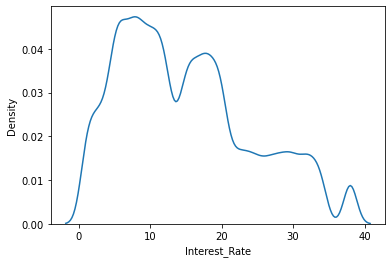

In [61]:
sns.kdeplot(x='Interest_Rate',data=df)
plt.show()

<p style="color:blue">9. Num_of_Loan</p>

In [62]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [63]:
df['Num_of_Loan']= df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan']= df['Num_of_Loan'].str.replace('-','')
df['Num_of_Loan']= df['Num_of_Loan'].astype(int)
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967,  100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
        720, 1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,
        119,  663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,
       1214,  186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1480,
       1047, 1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,
        995,  545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,
        323, 1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95,
       1353, 1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,
        911, 1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,
        420, 1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,
         23,  238,  638,  138,  235,  280, 1070, 1484,  274,  494, 1459,
        404, 1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,
        961, 1046,  834,  284,  438,  288, 1463, 11

In [64]:
check_outliers('Num_of_Loan', df)

[967,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 1464,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 622,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 352,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 472,
 100,
 1017,
 945,
 100,
 146,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 563,
 341,
 100,
 100,
 444,
 100,
 100,
 100,
 100,
 100,
 720,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 1485,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 49,
 737,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 1106,
 100,
 100,
 466,
 100,
 100,
 728,
 100,
 100,
 100,
 100,
 100,
 100,
 313,
 100,
 100,
 100,
 100,
 843,
 100,
 100,
 

In [65]:
handle_outliers('Num_of_Loan',df)
check_outliers('Num_of_Loan', df)

[]

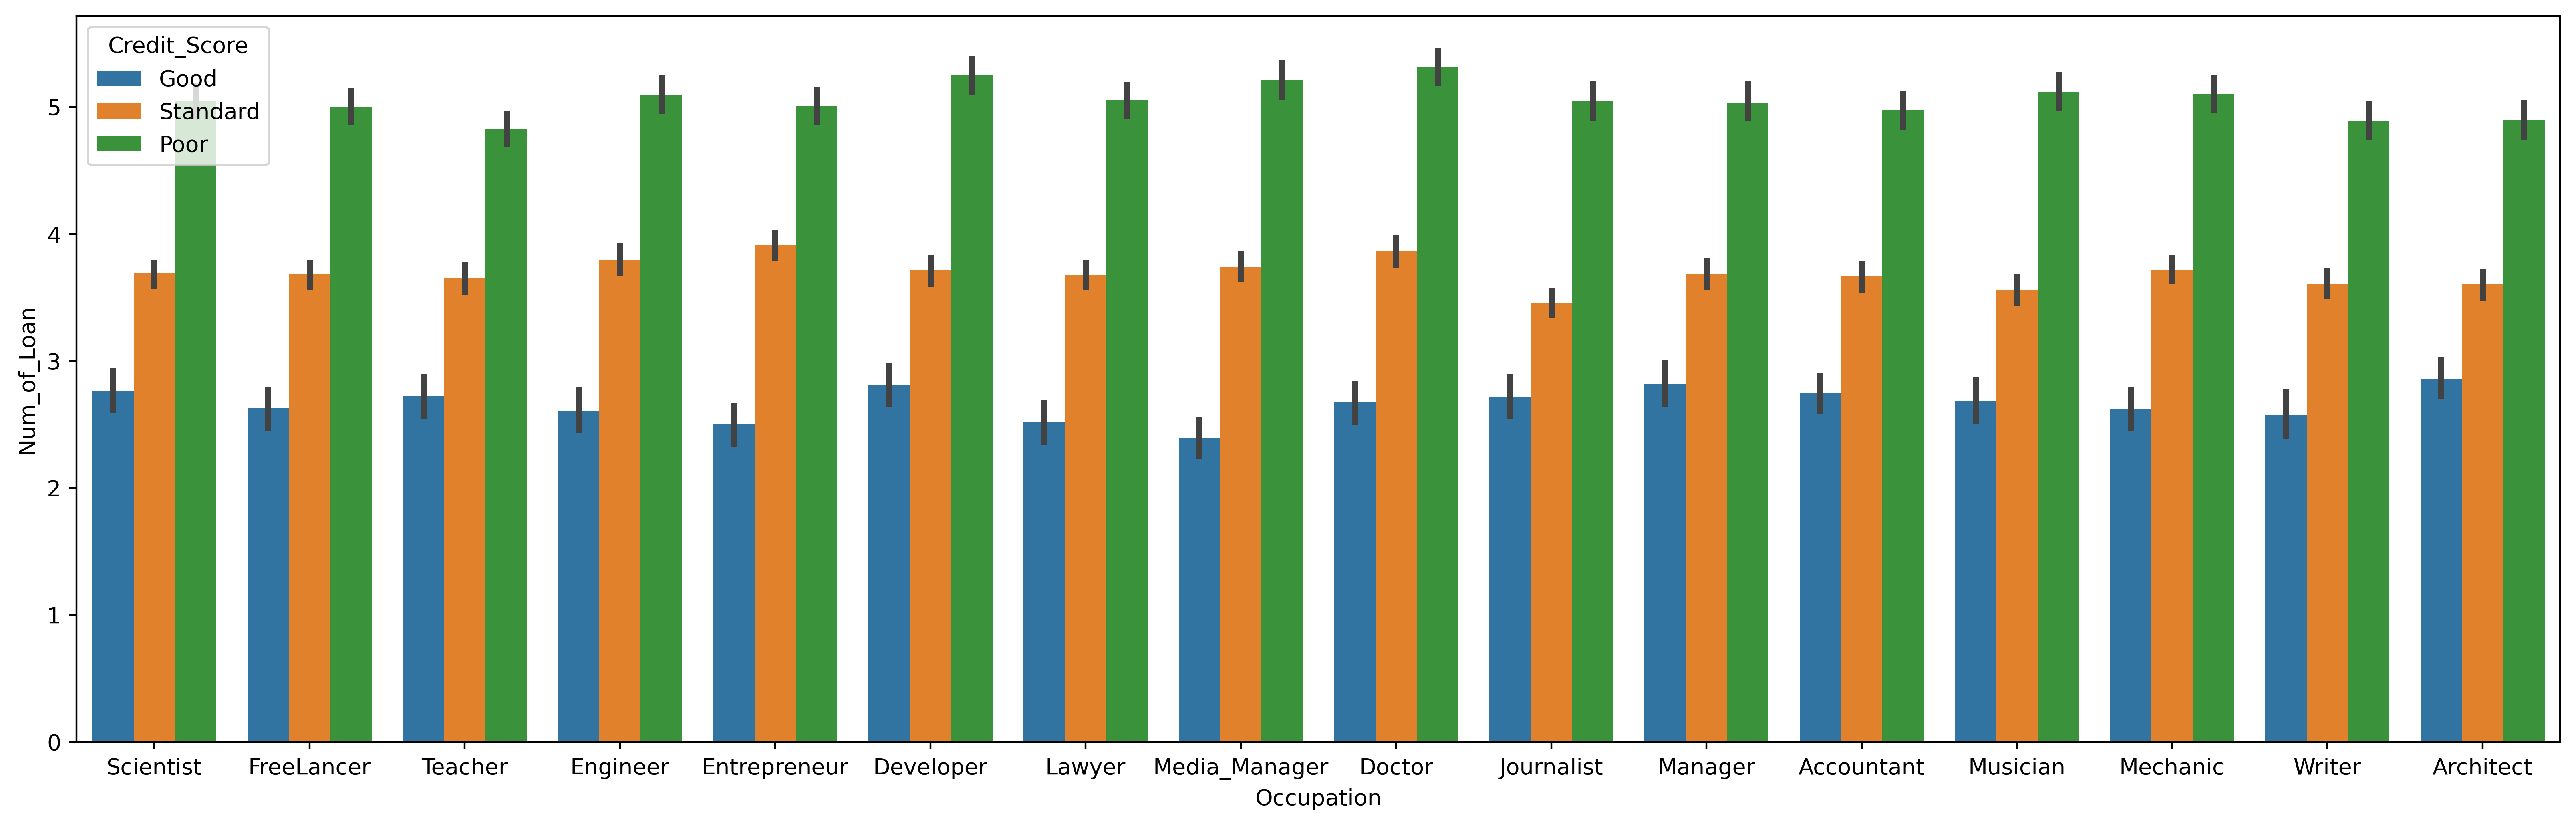

In [66]:
plt.figure(figsize=(20,6), dpi=400)
sns.barplot(x='Occupation', y='Num_of_Loan',data=df,hue='Credit_Score')
plt.show()

<p style="color:blue">10. Delay_from_due_date</p>

In [67]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [68]:
# Convertir la valeur négatif en 0
df[df['Delay_from_due_date']<0]=0
df['Delay_from_due_date'].unique()

array([ 3,  0,  5,  6,  8,  7, 13, 10,  4,  9,  1, 12, 11, 30, 31, 34, 27,
       14,  2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26, 43, 28,
       25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57, 54, 62,
       65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, 63, 40, 37, 66],
      dtype=int64)

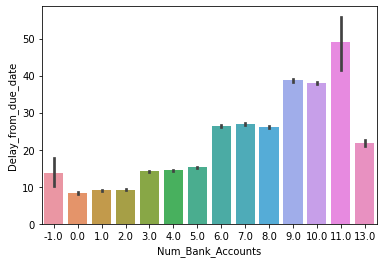

In [69]:
sns.barplot(x=df['Num_Bank_Accounts'], y=df['Delay_from_due_date'], data=df)
plt.show()

In [70]:
check_outliers('Delay_from_due_date',df)

[61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 58,
 59,
 56,
 59,
 59,
 59,
 61,
 57,
 59,
 57,
 57,
 57,
 57,
 62,
 62,
 65,
 62,
 62,
 62,
 64,
 62,
 62,
 62,
 62,
 62,
 62,
 67,
 59,
 62,
 57,
 57,
 59,
 57,
 57,
 57,
 62,
 61,
 65,
 61,
 61,
 61,
 61,
 61,
 61,
 60,
 60,
 64,
 60,
 60,
 60,
 60,
 60,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 61,
 58,
 61,
 61,
 56,
 65,
 65,
 61,
 56,
 60,
 63,
 61,
 61,
 61,
 61,
 61,
 56,
 56,
 57,
 59,
 62,
 62,
 64,
 62,
 62,
 62,
 62,
 62,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 64,
 61,
 59,
 57,
 59,
 59,
 59,
 59,
 60,
 65,
 60,
 60,
 57,
 59,
 60,
 60,
 59,
 60,
 59,
 59,
 65,
 65,
 60,
 60,
 57,
 59,
 57,
 57,
 58,
 56,
 57,
 57,
 57,
 56,
 59,
 59,
 60,
 61,
 60,
 60,
 61,
 60,
 60,
 58,
 56,
 59,
 57,
 61,
 59,
 59,
 62,
 59,
 59,
 61,
 61,
 64,
 61,
 61,
 62,
 62,
 59,
 61,
 61,
 61,
 57,
 61,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 64,
 57,
 57,
 59,
 57,
 57,
 57,
 59,
 57,
 57,
 57,
 61,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,


In [71]:
handle_outliers('Delay_from_due_date',df)
check_outliers('Delay_from_due_date',df)

[]

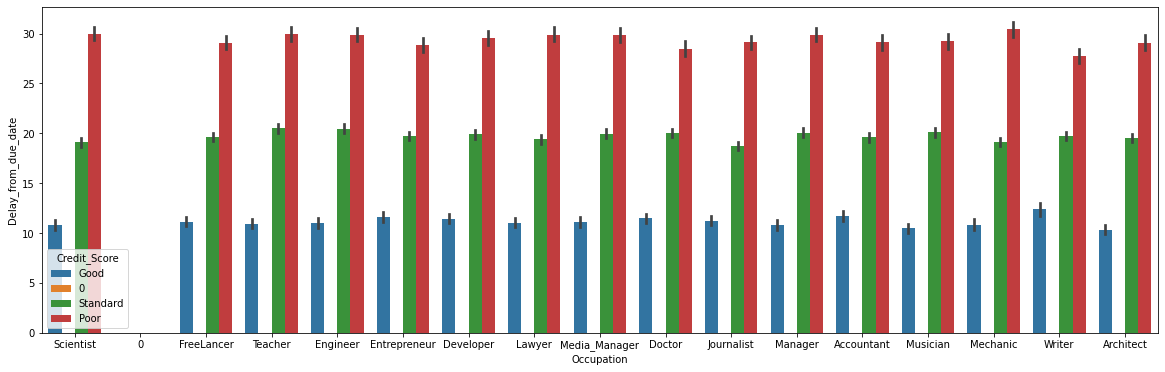

In [72]:
plt.figure(figsize=(20,6))
sns.barplot(x='Occupation', y='Delay_from_due_date',data=df, hue='Credit_Score')
plt.show()

<p style="color:blue">11. Num_of_Delayed_Payment</p>

In [73]:
df['Num_of_Delayed_Payment'].unique()

array(['7', 0, '4', nan, '8_', '6', '1', '-1', '3_', '0', '8', '5', '3',
       '9', '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22',
       '13', '13_', '14_', '16', '12_', '18', '19', '23', '24', '21',
       '3318', '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_',
       '25', '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_',
       '23_', '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27',
       '-2', '3478', '2420', '15_', '707', '708', '26_', '18_', '3815',
       '28', '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '0_', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569_', '211', '793', '3484',

In [74]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].str.replace('-','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [75]:
check_outliers('Num_of_Delayed_Payment',df)

[3318.0,
 3083.0,
 1338.0,
 3104.0,
 183.0,
 1106.0,
 834.0,
 2672.0,
 2008.0,
 538.0,
 3478.0,
 2420.0,
 707.0,
 708.0,
 3815.0,
 1867.0,
 2250.0,
 1463.0,
 4126.0,
 2882.0,
 1941.0,
 2655.0,
 2628.0,
 132.0,
 3069.0,
 306.0,
 3539.0,
 3684.0,
 1823.0,
 4128.0,
 1946.0,
 827.0,
 2297.0,
 2566.0,
 904.0,
 182.0,
 929.0,
 3568.0,
 2503.0,
 1552.0,
 2812.0,
 1697.0,
 3764.0,
 851.0,
 3905.0,
 923.0,
 88.0,
 1668.0,
 3253.0,
 808.0,
 2689.0,
 3858.0,
 642.0,
 3457.0,
 1402.0,
 1732.0,
 3154.0,
 847.0,
 3037.0,
 2204.0,
 3103.0,
 1063.0,
 2056.0,
 1282.0,
 1841.0,
 2569.0,
 211.0,
 793.0,
 3484.0,
 411.0,
 3491.0,
 2072.0,
 3050.0,
 1049.0,
 2162.0,
 3402.0,
 2753.0,
 1718.0,
 1014.0,
 3260.0,
 1946.0,
 3855.0,
 84.0,
 2311.0,
 3251.0,
 1832.0,
 4069.0,
 3010.0,
 733.0,
 4241.0,
 166.0,
 2461.0,
 1749.0,
 3200.0,
 663.0,
 2185.0,
 4161.0,
 3009.0,
 359.0,
 2015.0,
 1523.0,
 594.0,
 1079.0,
 1199.0,
 186.0,
 1015.0,
 1989.0,
 281.0,
 559.0,
 2165.0,
 1509.0,
 3545.0,
 779.0,
 192.0,
 4311.0

In [76]:
handle_outliers('Num_of_Delayed_Payment',df)
check_outliers('Num_of_Delayed_Payment',df)

[]

In [77]:
df['Num_of_Delayed_Payment'].isna().sum()

7556

In [78]:
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean(), inplace=True)
df['Num_of_Delayed_Payment'].isna().sum()

0

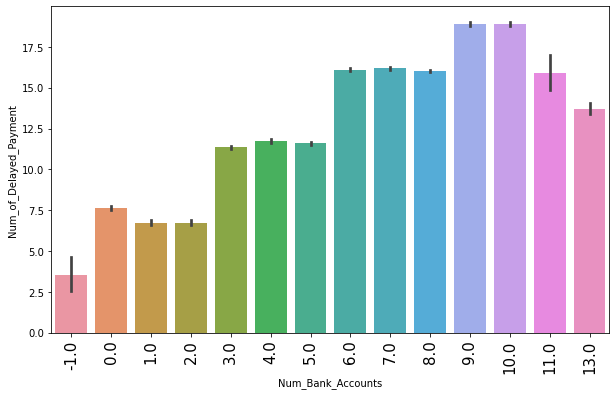

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Num_Bank_Accounts'], y=df['Num_of_Delayed_Payment'],data=df)
plt.xticks(fontsize=15, rotation='vertical')
plt.show()

<p style="color:blue">12. Changed_Credit_Limit</p>

In [80]:
df['Changed_Credit_Limit'].unique()

array(['11.27', 0, '_', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [81]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_','0')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('-', '')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('0', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace(np.nan, df['Changed_Credit_Limit'].mean())

In [82]:
df['Changed_Credit_Limit'].unique()

array([11.27      , 10.27100615,  0.        , ..., 17.51      ,
       25.16      , 21.17      ])

In [83]:
check_outliers('Changed_Credit_Limit',df)

[29.52,
 29.52,
 31.52,
 29.52,
 29.52,
 29.52,
 29.52,
 29.52,
 29.21,
 32.64,
 33.43,
 34.02,
 35.82,
 29.82,
 29.82,
 29.82,
 29.82,
 29.82,
 29.82,
 29.18,
 31.33,
 29.33,
 34.81,
 29.94,
 32.18,
 29.19,
 29.19,
 29.19,
 29.19,
 29.19,
 29.19,
 30.47,
 30.47,
 31.07,
 29.9,
 31.46,
 35.83,
 30.45,
 33.19,
 29.97,
 29.97,
 29.97,
 29.97,
 29.97,
 30.91,
 33.02,
 32.47,
 34.91,
 32.980000000000004,
 34.47,
 32.09,
 32.09,
 31.09,
 33.61,
 31.71,
 30.32,
 29.77,
 31.77,
 29.77,
 29.77,
 34.77,
 29.77,
 29.77,
 29.77,
 32.620000000000005,
 30.62,
 29.41,
 30.06,
 29.94,
 35.4,
 33.4,
 30.25,
 32.84,
 29.84,
 29.84,
 29.84,
 29.84,
 29.84,
 29.84,
 29.22,
 34.120000000000005,
 30.12,
 29.49,
 29.64,
 29.64,
 29.64,
 32.64,
 29.64,
 29.64,
 29.64,
 29.64,
 29.45,
 29.45,
 29.45,
 29.45,
 29.45,
 29.45,
 31.45,
 29.81,
 31.82,
 29.12,
 31.79,
 31.79,
 31.61,
 29.66,
 32.66,
 29.5,
 30.12,
 30.85,
 33.239999999999995,
 32.0,
 32.45,
 32.4,
 33.260000000000005,
 29.26,
 29.26,
 31.26,
 31.0

In [84]:
handle_outliers('Changed_Credit_Limit',df)
check_outliers('Changed_Credit_Limit',df)

[]

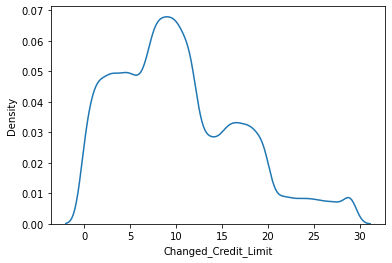

In [85]:
sns.kdeplot(df['Changed_Credit_Limit'])
plt.show()

<p style="color:blue">13. Num_Credit_Inquiries</p>

In [86]:
df['Num_Credit_Inquiries'].unique()

array([   4.,    0.,    2., ..., 1361.,  310.,   74.])

In [87]:
df['Num_Credit_Inquiries'].isna().sum()

1951

In [88]:
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(),inplace=True)
df['Num_Credit_Inquiries'].isna().sum()

0

In [89]:
check_outliers('Num_Credit_Inquiries',df)

[1050.0,
 1044.0,
 1936.0,
 568.0,
 1618.0,
 525.0,
 1251.0,
 76.0,
 285.0,
 119.0,
 651.0,
 1241.0,
 1839.0,
 1953.0,
 2321.0,
 1265.0,
 1265.0,
 2473.0,
 2271.0,
 1085.0,
 1194.0,
 2006.0,
 1952.0,
 1197.0,
 2238.0,
 996.0,
 1515.0,
 418.0,
 516.0,
 89.0,
 829.0,
 821.0,
 1760.0,
 46.0,
 1332.0,
 2539.0,
 1673.0,
 546.0,
 33.0,
 602.0,
 1122.0,
 2134.0,
 1151.0,
 955.0,
 103.0,
 168.0,
 1386.0,
 1985.0,
 794.0,
 2079.0,
 1189.0,
 977.0,
 2158.0,
 1279.0,
 460.0,
 1683.0,
 304.0,
 486.0,
 1351.0,
 86.0,
 1282.0,
 1347.0,
 2592.0,
 2161.0,
 471.0,
 1529.0,
 739.0,
 1615.0,
 1732.0,
 1251.0,
 2187.0,
 206.0,
 57.0,
 197.0,
 1864.0,
 1197.0,
 458.0,
 1340.0,
 61.0,
 1395.0,
 1119.0,
 1114.0,
 321.0,
 1992.0,
 2572.0,
 1479.0,
 205.0,
 876.0,
 1890.0,
 2081.0,
 946.0,
 1393.0,
 1672.0,
 1203.0,
 1247.0,
 1244.0,
 1015.0,
 574.0,
 1661.0,
 2138.0,
 361.0,
 364.0,
 1498.0,
 1562.0,
 2063.0,
 203.0,
 2297.0,
 34.0,
 2043.0,
 2128.0,
 1425.0,
 2310.0,
 2207.0,
 824.0,
 536.0,
 2056.0,
 1078.0

In [90]:
handle_outliers('Num_Credit_Inquiries',df)
check_outliers('Num_Credit_Inquiries',df)

[]

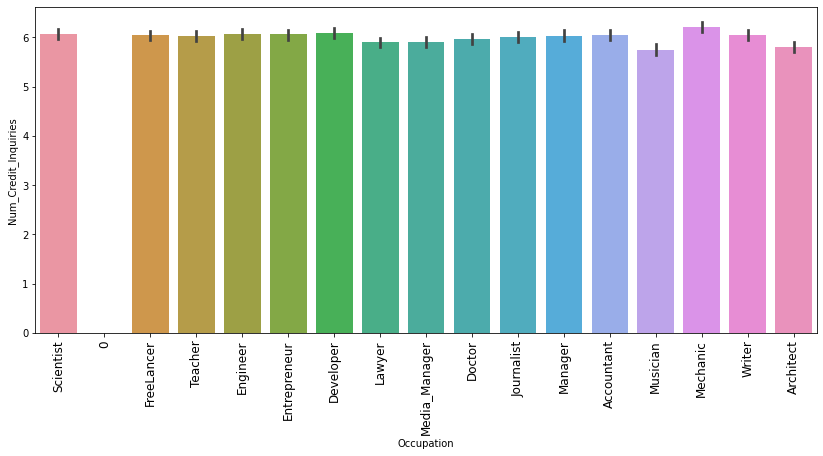

In [91]:
plt.figure(figsize=(14,6))
sns.barplot(x='Occupation', y='Num_Credit_Inquiries',data=df)
plt.xticks(fontsize=12,rotation='vertical')
plt.show()

<p style="color:blue">14. Credit_Mix</p>

In [92]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        23859
_           20082
Bad         18989
0             591
Name: Credit_Mix, dtype: int64

In [93]:
df['Credit_Mix']= df['Credit_Mix'].str.replace('_','Standard')

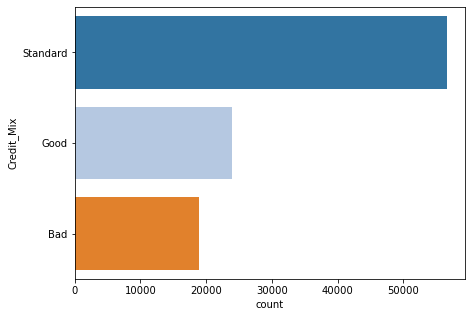

In [94]:
plt.figure(figsize=(7,5))
sns.countplot(y='Credit_Mix', data=df,palette="tab20")
plt.show()

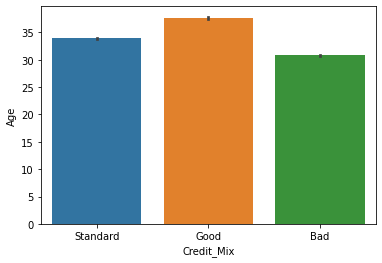

In [95]:
sns.barplot(x=df['Credit_Mix'],y=df['Age'], data=df)
plt.show()

In [96]:
df['Credit_Mix']=df['Credit_Mix'].map({'Bad':1,'Standard':2,'Good':3})

In [97]:
df['Credit_Mix'].isna().sum()

591

In [98]:
df['Credit_Mix'].fillna(df['Credit_Mix'].median(),inplace=True)
df['Credit_Mix'].isna().sum()

0

<p style="color:blue">15. Outstanding_Debt</p>

In [99]:
df['Outstanding_Debt'].unique()

array(['809.98', 0, '605.03', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [100]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('-','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [101]:
check_outliers('Outstanding_Debt',df)

[4071.62,
 4071.62,
 4071.62,
 4071.62,
 4071.62,
 4071.62,
 4071.62,
 4071.62,
 4834.59,
 4834.59,
 4834.59,
 4834.59,
 4834.59,
 4834.59,
 4834.59,
 4834.59,
 4795.13,
 4795.13,
 4795.13,
 4795.13,
 4795.13,
 4795.13,
 4795.13,
 4795.13,
 4984.82,
 4984.82,
 4984.82,
 4984.82,
 4984.82,
 4984.82,
 4984.82,
 4984.82,
 4845.24,
 4845.24,
 4845.24,
 4845.24,
 4845.24,
 4845.24,
 4845.24,
 4845.24,
 4428.64,
 4428.64,
 4428.64,
 4428.64,
 4428.64,
 4428.64,
 4428.64,
 4428.64,
 4167.43,
 4167.43,
 4167.43,
 4167.43,
 4167.43,
 4167.43,
 4167.43,
 4167.43,
 4445.32,
 4445.32,
 4445.32,
 4445.32,
 4445.32,
 4445.32,
 4445.32,
 4445.32,
 4404.48,
 4404.48,
 4404.48,
 4404.48,
 4404.48,
 4404.48,
 4404.48,
 4404.48,
 4525.08,
 4525.08,
 4525.08,
 4525.08,
 4525.08,
 4525.08,
 4525.08,
 4525.08,
 4288.63,
 4288.63,
 4288.63,
 4288.63,
 4288.63,
 4288.63,
 4288.63,
 4288.63,
 4685.34,
 4685.34,
 4685.34,
 4685.34,
 4685.34,
 4685.34,
 4685.34,
 4685.34,
 4736.25,
 4736.25,
 4736.25,
 4736.25,


In [102]:
handle_outliers('Outstanding_Debt',df)
check_outliers('Outstanding_Debt',df)

[]

In [103]:
df['Outstanding_Debt'].isna().sum()

591

In [104]:
df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median(), inplace=True)
df['Outstanding_Debt'].isna().sum()

0

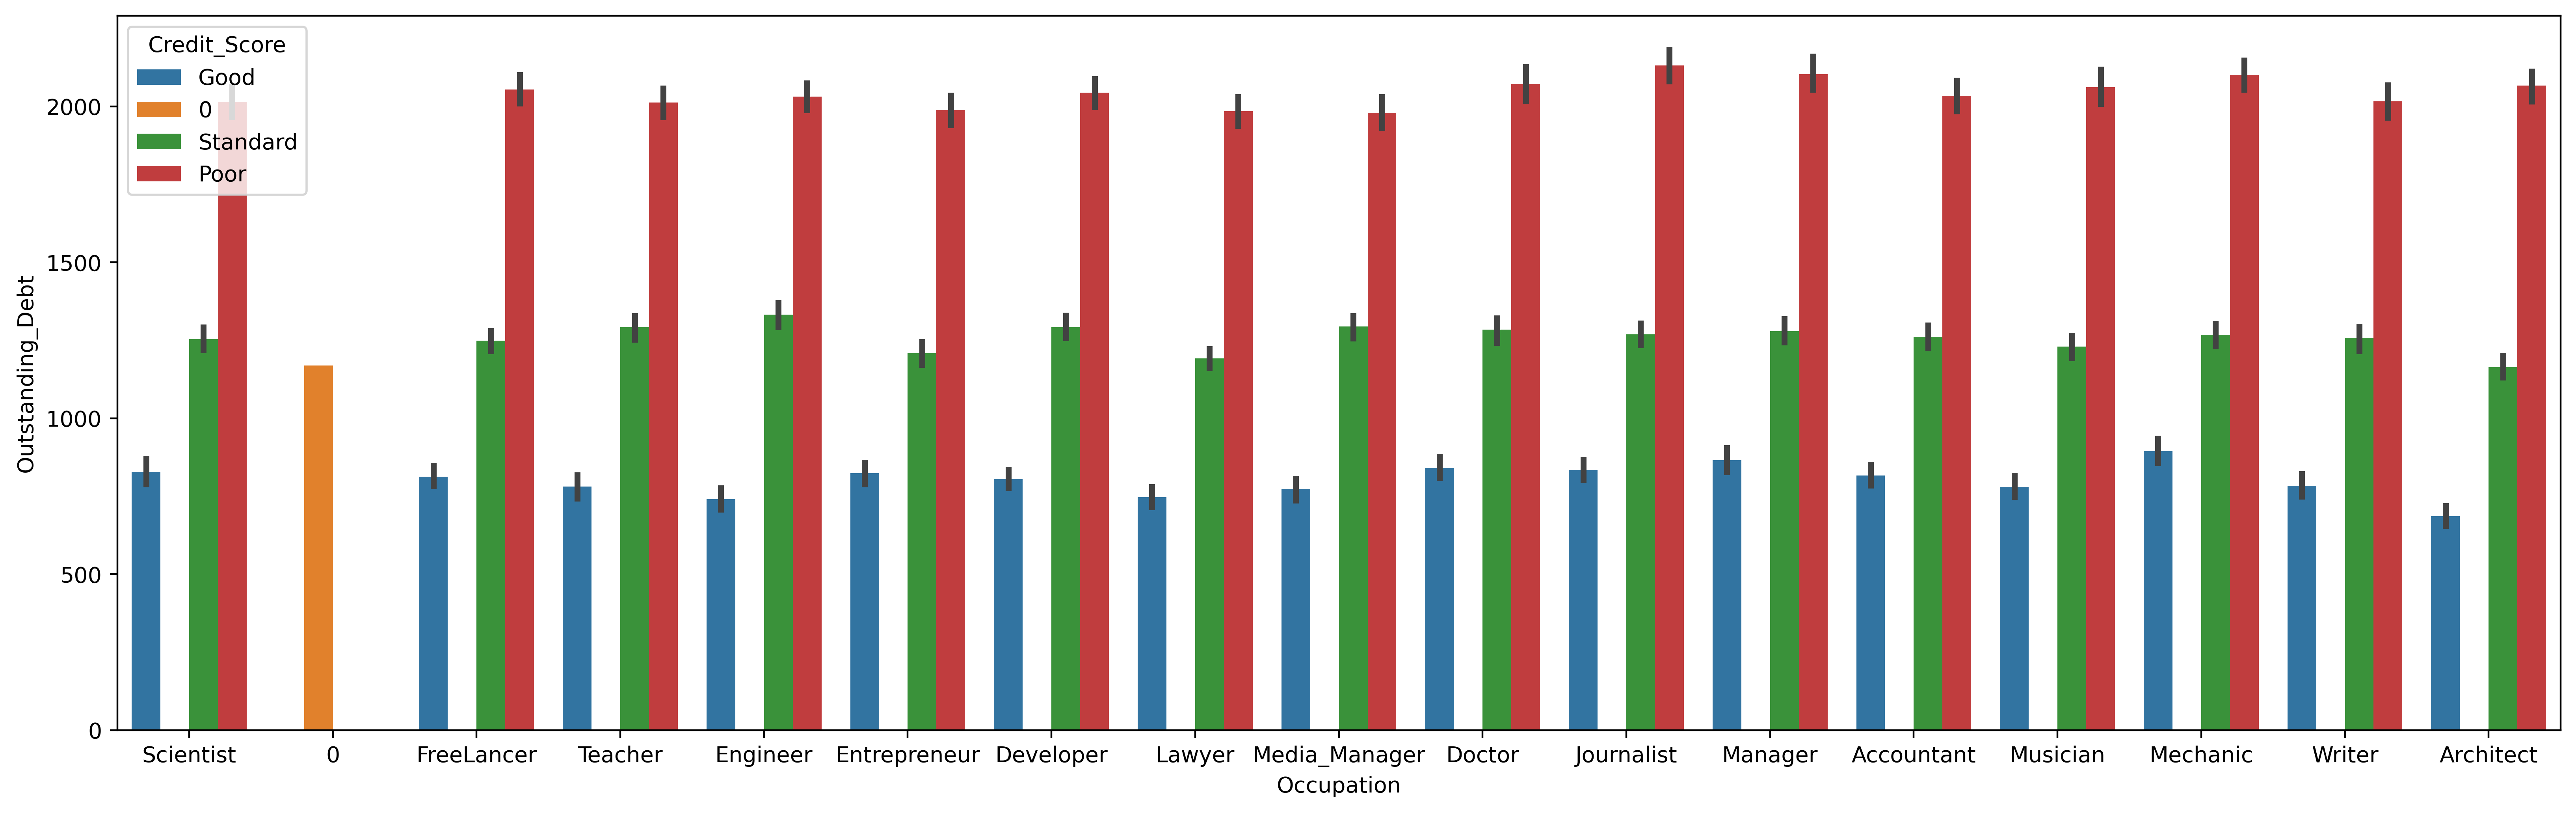

In [105]:
plt.figure(figsize=(20,6),dpi=400)
sns.barplot(x='Occupation',y='Outstanding_Debt',data=df, hue='Credit_Score')
plt.show()

<p style="color:blue">16. Credit_Utilization_Ratio</p>

In [106]:
df['Credit_Utilization_Ratio'].unique()

array([26.82261962,  0.        , 28.60935202, ..., 41.25552226,
       33.63820798, 34.19246265])

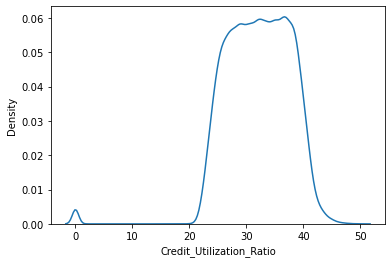

In [107]:
sns.kdeplot(x=df['Credit_Utilization_Ratio'],data=df)
plt.show()

In [108]:
check_outliers('Credit_Utilization_Ratio',df)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 50.00000000000001,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 49.52232429787243,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [109]:
handle_outliers('Credit_Utilization_Ratio',df)
check_outliers('Credit_Utilization_Ratio',df)

[]

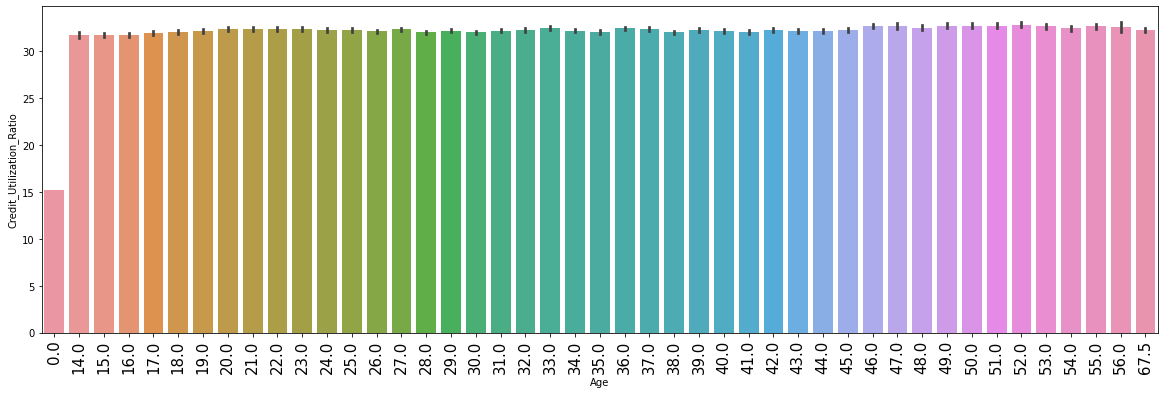

In [110]:
plt.figure(figsize=(20,6))
plt.xticks(fontsize=15, rotation='vertical')
sns.barplot(x=df['Age'],y=df['Credit_Utilization_Ratio'], data=df)
plt.show()

<p style="color:blue">17. Payment_Behaviour</p>

In [111]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25391
High_spent_Medium_value_payments    17445
Low_spent_Medium_value_payments     13761
High_spent_Large_value_payments     13616
High_spent_Small_value_payments     11280
Low_spent_Large_value_payments      10363
!@9#%8                               7553
0                                     591
Name: Payment_Behaviour, dtype: int64

In [112]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8', 'Low_spent_Small_value_payments')
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments', nan,
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [113]:
df['Payment_Behaviour'].isna().sum()

591

In [114]:
df['Payment_Behaviour']=df['Payment_Behaviour'].map({'High_spent_Small_value_payments':0,
                                                     'Low_spent_Large_value_payments':1,
                                                     'Low_spent_Medium_value_payments':2,
                                                     'Low_spent_Small_value_payments':3,
                                                     'High_spent_Medium_value_payments':4,
                                                     'High_spent_Large_value_payments':5
                                                     })

In [115]:
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].median(),inplace=True)
df['Payment_Behaviour'].isna().sum()

0

In [116]:
df['Payment_Behaviour'].value_counts()

3.0    33535
4.0    17445
2.0    13761
5.0    13616
0.0    11280
1.0    10363
Name: Payment_Behaviour, dtype: int64

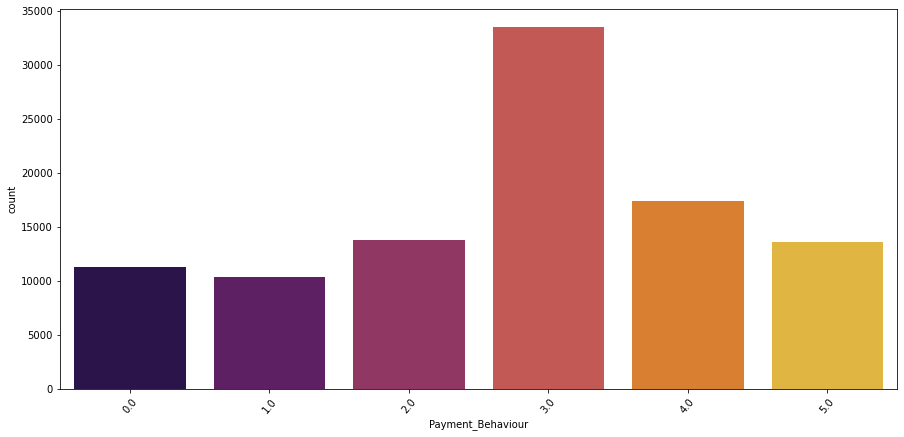

In [117]:
plt.figure(figsize=(15,7))
sns.countplot(x='Payment_Behaviour', data = df, palette='inferno')
plt.xticks(rotation=50)
plt.show()

<p style="color:blue">18. Total_EMI_per_month</p>

In [118]:
df['Total_EMI_per_month'].unique()

array([4.95749492e+01, 0.00000000e+00, 1.88162146e+01, ...,
       1.21120000e+04, 3.51040226e+01, 5.86380000e+04])

In [119]:
df['Total_EMI_per_month'].isna().sum()

0

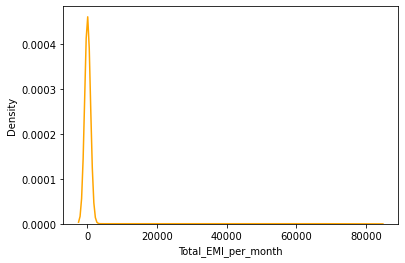

In [120]:
sns.kdeplot(x=df['Total_EMI_per_month'], data=df, color="orange")
plt.show()

In [121]:
check_outliers('Total_EMI_per_month',df)

[15015.0,
 15515.0,
 911.2201793459374,
 23834.0,
 32662.0,
 911.2201793459374,
 911.2201793459374,
 911.2201793459374,
 16415.0,
 80357.0,
 629.8156531464217,
 629.8156531464217,
 629.8156531464217,
 629.8156531464217,
 629.8156531464217,
 56566.0,
 33746.0,
 14130.0,
 5994.0,
 31551.0,
 62073.0,
 37602.0,
 14982.0,
 364.9151774048712,
 364.9151774048712,
 364.9151774048712,
 364.9151774048712,
 364.9151774048712,
 364.9151774048712,
 364.9151774048712,
 364.9151774048712,
 81050.0,
 10292.0,
 19734.0,
 574.0657978713467,
 574.0657978713467,
 574.0657978713467,
 574.0657978713467,
 574.0657978713467,
 574.0657978713467,
 574.0657978713467,
 574.0657978713467,
 81441.0,
 485.75043098703753,
 485.75043098703753,
 485.75043098703753,
 485.75043098703753,
 485.75043098703753,
 485.75043098703753,
 485.75043098703753,
 485.75043098703753,
 50812.0,
 39347.0,
 3864.0,
 64504.0,
 1293.5054487288114,
 1293.5054487288114,
 1293.5054487288114,
 57516.0,
 57523.0,
 35788.0,
 35022.0,
 44834.0,
 

In [122]:
handle_outliers('Total_EMI_per_month',df)
check_outliers('Total_EMI_per_month',df)

[]

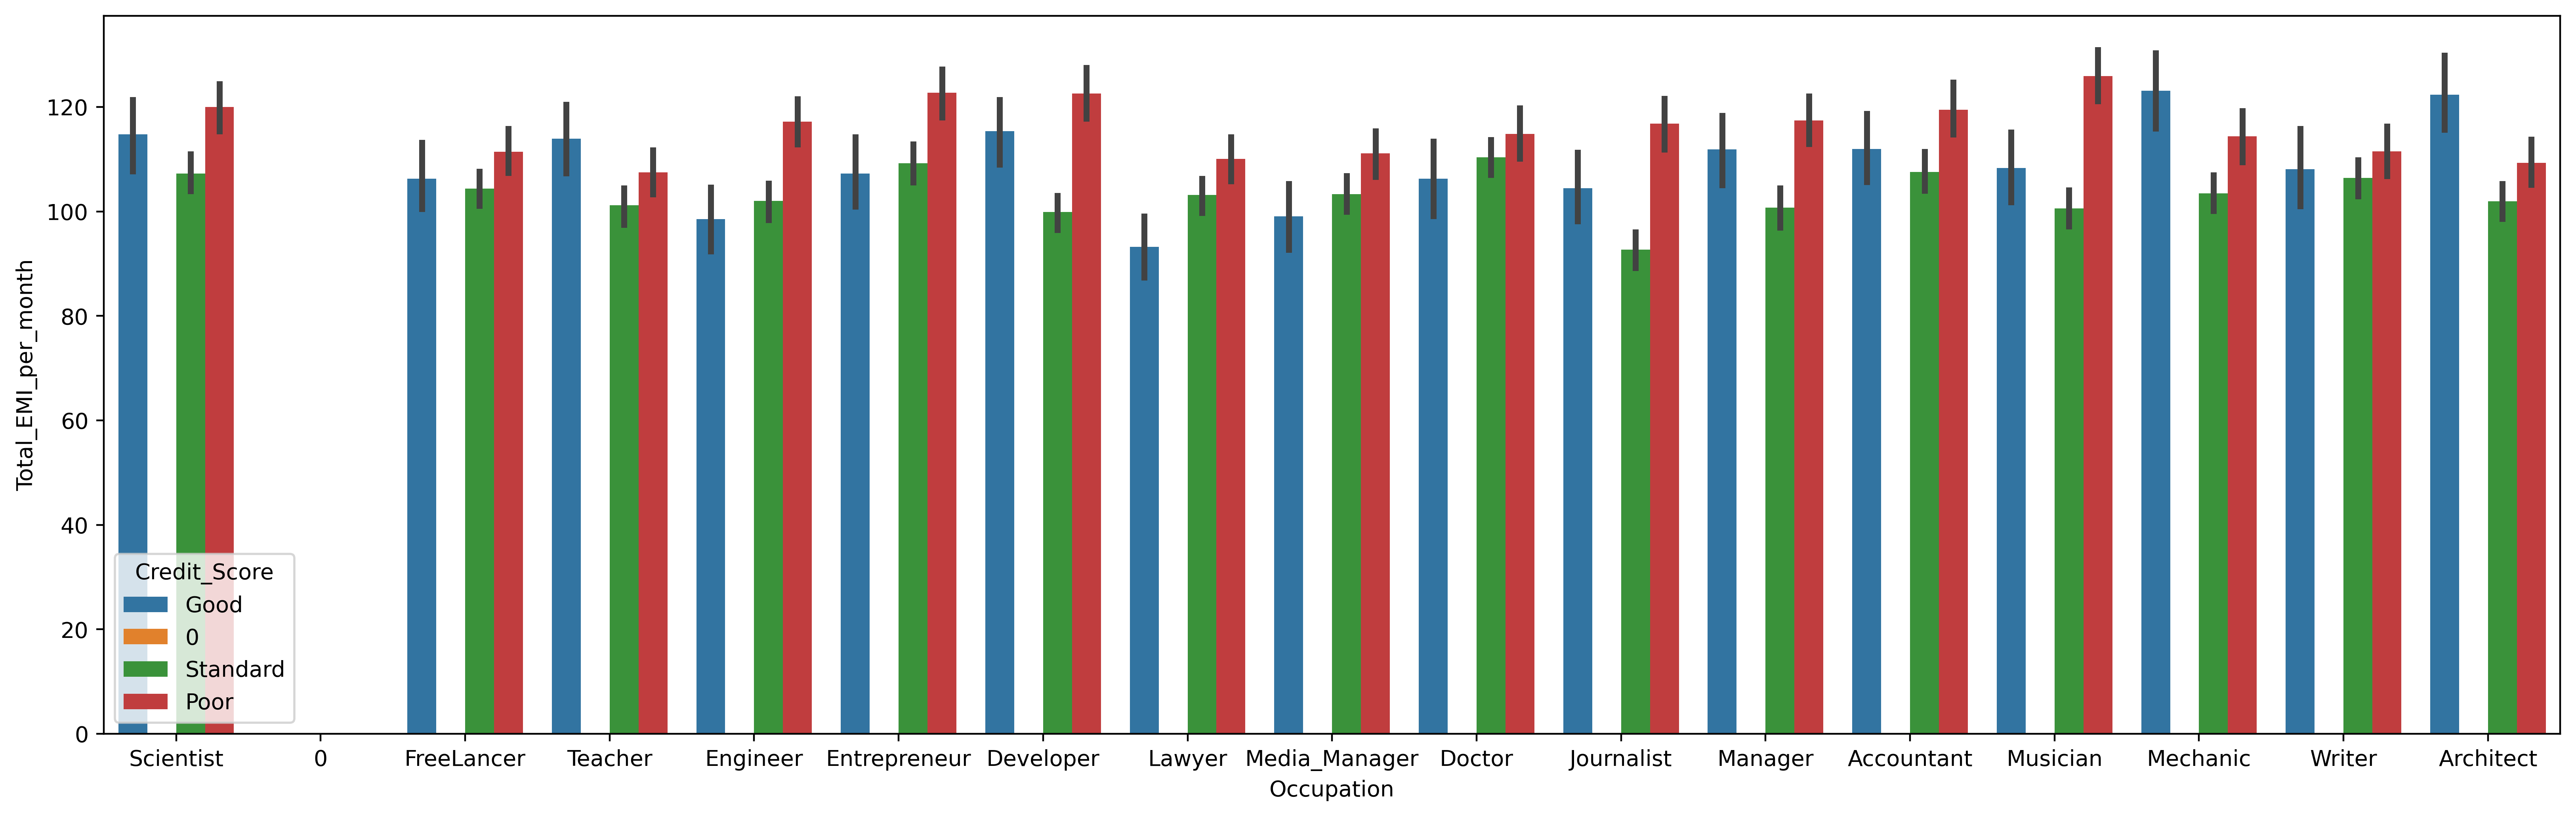

In [123]:
plt.figure(figsize=(20,6),dpi=400)
sns.barplot(x='Occupation', y='Total_EMI_per_month', data=df, hue='Credit_Score')
plt.show()

<p style="color:blue">19. Colonne 'Credit_History_Age'</p>

In [124]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', 0, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months', nan,
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years 

In [125]:
df['Credit_History_Age'].isna().sum()

8965

In [126]:
# Remplir les valeurs manquantes par la valeur qui appraît le plus fréquemment (mode())
df['Credit_History_Age'].fillna(df['Credit_History_Age'].mode(), inplace=True)
df['Credit_History_Age'].isna().sum()

8965

In [127]:
# Diviser la colonne 'Credit_History_Age' en deux parties (year et month)
df['Credit_History_Year'], df['Credit_History_Month'] = df['Credit_History_Age'].str.split('and' ,2).str
# Supprimer la colonne 'Credit_History_Age'
df.drop('Credit_History_Age', axis=1, inplace=True)
df['Credit_History_Year'] = df['Credit_History_Year'].str.replace('Years','')
df['Credit_History_Month'] = df['Credit_History_Month'].str.replace('Months','')

In [128]:
df['Credit_History_Year']

0        22  
1         NaN
2        22  
3        22  
4        22  
         ... 
99995    31  
99996    31  
99997    31  
99998    31  
99999    31  
Name: Credit_History_Year, Length: 100000, dtype: object

In [129]:
df['Credit_History_Month']

0          1 
1         NaN
2          3 
3          4 
4          5 
         ... 
99995      6 
99996      7 
99997      8 
99998      9 
99999     10 
Name: Credit_History_Month, Length: 100000, dtype: object

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

<p style="color:blue">20. Payment_of_Min_Amount</p>

In [131]:
df['Payment_of_Min_Amount'].unique()

array(['No', 0, 'NM', 'Yes'], dtype=object)

In [132]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35138
NM     11945
0        591
Name: Payment_of_Min_Amount, dtype: int64

In [133]:
df['Payment_of_Min_Amount'].isna().sum()

0

<p style="color:blue">21. Amount_invested_monthly</p>

In [134]:
df['Amount_invested_monthly'].value_counts()

__10000__             4280
0                      591
0.0                    169
79.4101523287122         1
131.90043837080367       1
                      ... 
74.05539521924004        1
673.8870614704617        1
177.58738642206052       1
328.3376304601956        1
265.22900955871927       1
Name: Amount_invested_monthly, Length: 90507, dtype: int64

In [135]:
df['Amount_invested_monthly']= df['Amount_invested_monthly'].str.replace('__','')
df['Amount_invested_monthly']= df['Amount_invested_monthly'].astype(float)

In [136]:
df['Amount_invested_monthly'].isna().sum()

5047

In [137]:
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(),inplace=True)
df['Amount_invested_monthly'].isna().sum()

0

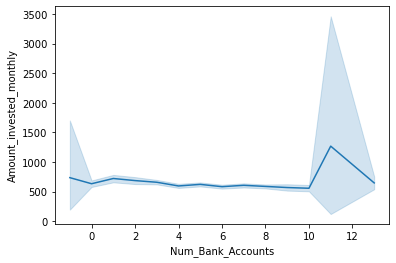

In [138]:
sns.lineplot(x=df['Num_Bank_Accounts'],y=df['Amount_invested_monthly'],data=df)
plt.show()

In [139]:
handle_outliers('Amount_invested_monthly',df)
check_outliers('Amount_invested_monthly',df)

[]

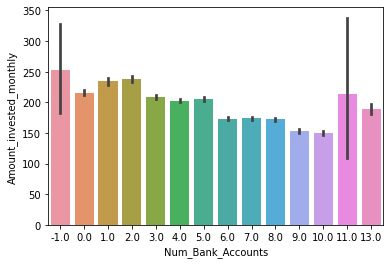

In [140]:
sns.barplot(x=df['Num_Bank_Accounts'], y=df['Amount_invested_monthly'],data=df)
plt.show()

<p style="color:blue">22. Colonne 'Monthly_Balance'</p>

In [141]:
df['Monthly_Balance'].value_counts()

0                                   591
__-333333333333333333333333333__      9
322.4121650753958                     1
599.1820243477395                     1
83.61850215531638                     1
                                   ... 
525.9803541397366                     1
344.3544253897661                     1
909.2033933456046                     1
276.13971595371015                    1
597.76630278323                       1
Name: Monthly_Balance, Length: 98210, dtype: int64

In [142]:
# Convertir la colonne en numériques, si une valeur ne peut pas être convertir, sera remplacée par NaN
#df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
#month_mean=df["Monthly_Balance"].mean()
#df["Monthly_Balance"].fillna(month_mean, inplace=True)
#df['Monthly_Balance'].isna().sum()
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('__','')
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)


In [143]:
df['Monthly_Balance'].isna().sum()

3441

In [144]:
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)
df['Monthly_Balance'].isna().sum()

0

In [145]:
check_outliers('Monthly_Balance',df)

[1043.3159778669492,
 998.8692967863226,
 810.7821526659284,
 963.9215811205684,
 968.5555173846187,
 895.494583180492,
 796.2349097481042,
 858.462474411158,
 1038.5694068321734,
 899.1987716145285,
 963.2548189998564,
 1140.0673399198365,
 802.3004421328528,
 785.2583558699787,
 772.411908624267,
 792.0256603398883,
 854.5248768604907,
 823.7133773417005,
 878.2514462337779,
 920.4396545057373,
 782.5739727857823,
 939.8734297713614,
 761.0743967007086,
 755.2081802943327,
 881.6642742251445,
 970.3192716601593,
 939.6245613800266,
 947.6102963746632,
 768.9823963390119,
 955.3099214674013,
 791.733614589316,
 913.0316546874346,
 936.3073773982209,
 792.5790252202852,
 822.1939946638072,
 880.4274416639964,
 853.5473978404586,
 785.5315566758761,
 799.437983215134,
 795.554663772378,
 886.9776435574988,
 840.0253760517992,
 887.7276173808908,
 879.7520667701468,
 760.3649552023904,
 776.3343613074152,
 884.9056902902464,
 940.3944827695151,
 1157.8575217994078,
 789.4419359341587,
 1

In [146]:
handle_outliers('Monthly_Balance',df)
check_outliers('Monthly_Balance',df)

[]

<p style= "color:blue"> 23. Credit History Month</p>

In [147]:
df['Credit_History_Month'].unique()

array([' 1 ', nan, ' 3 ', ' 4 ', ' 5 ', ' 6 ', ' 7 ', ' 8 ', ' 9 ',
       ' 10 ', ' 11 ', ' 0 ', ' 2 '], dtype=object)

In [148]:
df['Credit_History_Month'].isna().sum()

9556

In [149]:
df['Credit_History_Month'].fillna(df['Credit_History_Month'].median(), inplace=True)
df['Credit_History_Month'].isna().sum()

0

<p style="color:blue">24. Credit History Year</p>

In [150]:
df['Credit_History_Year'].unique()

array(['22  ', nan, '26  ', '27  ', '17  ', '18  ', '30  ', '31  ',
       '32  ', '14  ', '15  ', '21  ', '19  ', '25  ', '8  ', '9  ',
       '16  ', '29  ', '6  ', '7  ', '10  ', '33  ', '12  ', '13  ',
       '28  ', '24  ', '1  ', '11  ', '20  ', '0  ', '5  ', '2  ', '3  ',
       '23  ', '4  '], dtype=object)

In [151]:
df['Credit_History_Year'].isna().sum()

9556

In [152]:
df['Credit_History_Year'].fillna(df['Credit_History_Year'].median(), inplace=True)
df['Credit_History_Year'].isna().sum()

0

<p style="color:blue">25. Credit_Score</p>

In [153]:
df['Credit_Score'].value_counts()

Standard    52961
Poor        28949
Good        17499
0             591
Name: Credit_Score, dtype: int64

In [154]:
df['Credit_Score']= df['Credit_Score'].map({'Poor':0,'Standard':1,'Good':2})

In [155]:
df['Credit_Score'].isna().sum()

591

In [156]:
df['Credit_Score'].fillna(df['Credit_Score'].median(), inplace=True)

In [157]:
df['Credit_Score'].isna().sum()

0

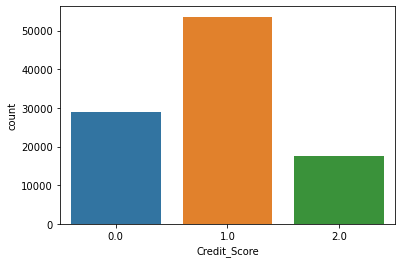

In [158]:
sns.countplot(df['Credit_Score'])
plt.show()

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [160]:
# Créer des variables indicatrices pour la colonne 'Occupation'
df = pd.get_dummies(df, columns=['Occupation'],drop_first=True)
df = pd.get_dummies(df)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 88 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Month                      100000 non-null  int64  
 1   Age                        100000 non-null  float64
 2   Annual_Income              100000 non-null  float64
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  float64
 5   Num_Credit_Card            100000 non-null  float64
 6   Interest_Rate              100000 non-null  float64
 7   Num_of_Loan                100000 non-null  float64
 8   Delay_from_due_date        100000 non-null  float64
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Credit_Mix                 100000 non-null  float64
 13  Outstanding_Debt           100

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> PARTIE 3</h1>
    
<b>Machine Learning</b>
</div>

<h4>Classificateur de forêt aléatoire (Random Forest Classifier)</h4>

Modèle de classification de Random Forest est entraîné sur les données, et les performances sont évaluées en termes d'exactitude, de précision et de F1 score.

In [162]:
# les valeurs indépendantes(contient toutes les cols sauf 'Credit_Score')
X = df.drop('Credit_Score', axis=1).values
# la variable dépendante contient la colonne 'Credit_Score'
y = df['Credit_Score'].values

In [163]:
from sklearn.model_selection import train_test_split
# diviser les données en ensembles d'entraînement de test, 80% des données sont utilisées pour entraînement et 20% pour les tests.
# la graine aléatoire (random_state=42) assure la reproductibilité des résultats. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
from sklearn.ensemble import RandomForestClassifier
# créer et ajuster le modèle aux données d'entraînement
model = RandomForestClassifier()
model.fit(X_train, y_train)
# utiliser modèle entraîné pour faire des prédictions sur l'ens de test
y_pred = model.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
# fct qui prend les données de test, les étiquettes de test et le modèle entraîné
# renvoie des métriques d'évaluation tellles que l'exactitude, le rappel, la précision et le score de F1
def evaluate_model(X_test,y_test, model):
    y_pred = model.predict(X_test)
    #accuracy
    acc = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred, average='macro')
    precision = precision_score(y_test,y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    # Collecter les métriques dans le data frame pour les ensembles de test d'entrainement.
    return pd.Series({'Accuracy':acc,'Recall':recall,'Precision': precision,'F1 Score':f1})
    

In [166]:
pd.DataFrame({'Random Forest Classifier (Test)': evaluate_model(X_test,y_test,model),
              'Random Forest Classifier (Train)': evaluate_model(X_train, y_train, model)
             })

,Random Forest Classifier (Test),Random Forest Classifier (Train)
Accuracy,0.778200,1.0
Recall,0.756220,1.0
Precision,0.763581,1.0
F1 Score,0.759775,1.0


> <p><strong>Performance générale:</strong> L'exactitude(Accuracy) du modèle sur l'ensemble de test est d'environ 77.8%</p><p><strong>Performance sur l'ensemble de test et d'entrainement: </strong>L'exactitude, le rappel, la précision et le score de F1 sur l'ensemble de test sont légèrement inférieurs à ceux sur l'ensemble d'entraînement. Cela indique que le modèle pourrait être légèrement surajusté(overfitting) aux données d'entrainement.</p><p><strong>Recall:</strong> Le rappel est d'environ 75.6%, indiquant la capacité du modèle à identifier les vrais positifs parmi tous les cas réels positifs. Une valeur inférieure de rappel peut signifier que le modèle peut manquer certains cas positifs.</p><p><strong>Precision: </strong>La précision est d'environ 76.4%, indiquant la capacité du modèle à ne pas classer à tort les négatifs comme possitifs. Une valeur inférieure de précision pourrait signifier qu'il y a un nombre notable de faux positifs.</p><p><strong>Score F1: </strong>Le score F1, qui prend en compte à la fois la précision et le rappel, est d'environ 76%. Il fournit une mesure équilibrée entre la précision et le rappel</p>

<h4>K-Nearest Neighbors (KNN)</h4>

In [167]:
X = df.drop('Credit_Score',axis=1).values
y = df['Credit_Score'].values

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [169]:
from sklearn.preprocessing import StandardScaler
# Standardiser les données pour mettre à l'échelle les caractéristiques.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
# Utiliser 5 voisins dans le modèle
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

  File "C:\Users\33766\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [171]:
pd.DataFrame({'KNN (Test)': evaluate_model(X_test, y_test, model2),
              'KNN (Train)': evaluate_model(X_train, y_train, model2)
             })

,KNN (Test),KNN (Train)
Accuracy,0.568000,0.711838
Recall,0.489791,0.646304
Precision,0.526497,0.708883
F1 Score,0.497576,0.664984


> <p><strong>Performance générale </strong>L'exactitude sur l'ensemble de test est d'environ 56.8%, ce qui indique que le modèle prédit correctement la classe de crédit dans environ 56.8% des cas.</p><p><strong>Performance sur l'ensemble de test vs d'entraînement :</strong>L'exactitude, le rappel, la précision et le score F1 sur l'ensemble de test sont tous inférieurs à ceux sur l'ensemble d'entraînement. Cela suggère un possible surajustement (overfitting) du modèle aux données d'entraînement.</p><p><strong>Rappel :</strong> Le rappel est d'environ 48.98%, indiquant la capacité du modèle à identifier les vrais positifs parmi tous les cas réels positifs. Une valeur plus basse de rappel suggère que le modèle peut manquer certains cas positifs.</p><p><strong>Précision :</strong> La précision est d'environ 52.6%, indiquant la capacité du modèle à ne pas classer à tort les négatifs comme positifs. Une valeur plus basse de précision peut signifier qu'il y a un nombre notable de faux positifs.</p><p><strong>Score F1 :</strong>Le score F1, qui prend en compte à la fois la précision et le rappel, est d'environ 49.76%. Comme le score F1 est la moyenne harmonique entre la précision et le rappel, une valeur plus basse suggère un équilibre suboptimal entre ces deux métriques.</p>